In [57]:
import numpy as np
np.random.seed(42)
from matplotlib import pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, learning_curve

In [58]:
dataset = load_breast_cancer()
x = dataset.data
y = dataset.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [59]:
train_sizes, train_scores_matrix, test_scores_matrix = learning_curve(
    estimator=KNeighborsClassifier(),
    X=x_train,
    y=y_train,
    cv=10,
    n_jobs=-1
)

train_mean = np.mean(train_scores_matrix, axis=1)
train_std = np.std(train_scores_matrix, axis=1)
test_mean = np.mean(test_scores_matrix, axis=1)
test_std = np.std(test_scores_matrix, axis=1)

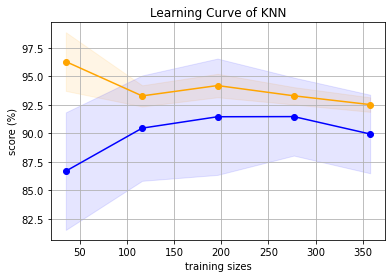

In [60]:
plt.figure()
plt.title("Learning Curve of KNN")
plt.xlabel("training sizes")
plt.ylabel("score (%)")
plt.grid()

train_mean_pcn = train_mean*100
train_std_pcn = train_std*100
test_mean_pcn = test_mean*100
test_std_pcn = test_std*100

plt.plot(train_sizes, train_mean_pcn, color="orange", marker="o")
plt.fill_between(
    x=train_sizes,
    y1=train_mean_pcn-train_std_pcn,
    y2=train_mean_pcn+train_std_pcn,
    alpha=0.1,
    color="orange"
)

plt.plot(train_sizes, test_mean_pcn, color="blue", marker="o")
plt.fill_between(
    x=train_sizes,
    y1=test_mean_pcn-test_std_pcn,
    y2=test_mean_pcn+test_std_pcn,
    alpha=0.1,
    color="blue"
)

plt.show()